Em parceria com Ana Luiza Young

# Pipelines, PCA, Clustering

Este estudo visa descobrir qual o país de origem de uma música, com base nos dados de características sonoras de áudios extraídos com o programa MARSYAS

In [12]:
import pandas as pd
pd.set_option('display.max_rows', 15)
data = pd.read_csv('default_features_1059_tracks.txt', sep=",", header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85
5,0.059217,0.034537,-0.703441,0.188652,-0.270353,1.420526,0.467766,0.209594,-0.496505,1.239908,...,0.501017,-0.354263,0.445184,0.060328,0.075293,-0.170387,-0.506187,-0.008470,12.65,-8.00
6,-0.280628,-0.310082,-0.756816,0.839033,-0.196670,1.153469,-0.473974,1.491603,-0.105328,1.365001,...,0.473937,-0.433843,0.813016,1.101685,-0.936123,-0.280096,-0.995073,-0.872726,12.65,-8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,-0.256823,-0.428191,-0.466053,0.253888,0.293756,0.500720,-1.031035,0.379445,-2.402813,0.122309,...,-0.722710,-0.826932,0.723062,-0.445762,-0.308901,-0.641950,-0.576358,-0.877030,41.71,44.78
1053,-0.108116,-0.096406,-0.044216,-0.502113,-0.279755,-0.003784,-0.036097,0.159209,0.161302,0.210124,...,-0.392326,-0.700825,-1.046674,-0.853647,-0.298798,-0.612668,-0.549285,-0.720027,-6.17,35.74


Temos uma base consideravelmente extensa. Vamos reduzir o escopo do estudo para apenas três capitais:

In [13]:
data_sorted = data.sort_values(68, 0, ascending = True)
data_s = data_sorted.iloc[0:100,0:70]

In [14]:
data_s

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
862,2.654318,3.802507,1.850741,-1.498866,-0.016933,-1.285616,-0.611298,-0.858004,-0.157574,-0.083673,...,1.198014,0.792160,1.106937,1.111763,0.680543,0.566725,0.859375,0.763855,-35.30,149.12
952,-0.011290,0.513719,-0.265201,0.407658,0.819534,-0.438491,-0.604161,0.147343,-0.371392,0.277186,...,1.870620,-0.373196,-0.282956,0.147258,-0.259322,0.341126,1.178357,1.040092,-35.30,149.12
769,-0.631194,-0.262990,0.272927,-0.098273,-1.588519,0.290227,1.454731,1.686073,0.263640,0.325048,...,-1.146426,-1.472497,-1.353373,-1.173457,-1.190651,-1.029769,-1.038497,-1.044751,-35.30,149.12
1045,-1.143279,-0.970393,6.157847,0.025562,-1.716427,-0.823866,1.131733,1.795106,1.090198,0.622713,...,-0.401103,-0.715838,-1.018796,-1.161952,-0.732602,-0.728074,-0.846290,-0.625809,-35.30,149.12
379,-0.342382,-0.140043,0.108868,-0.316431,0.937211,-0.394483,0.199727,0.206463,0.574196,0.202469,...,-0.707537,-1.395699,-0.565634,-0.882047,-0.960137,-0.963599,-0.599492,-0.644709,-35.30,149.12
102,-0.671627,0.450732,-0.353678,-0.826033,-2.962756,0.518470,1.059118,-1.514302,-0.410684,-0.646368,...,1.139840,1.173263,0.753943,0.692725,1.017846,0.958773,0.290780,0.466558,-35.30,149.12
101,1.221129,1.029825,0.927910,-0.348908,-2.083373,0.013500,0.482777,0.854047,0.392935,0.354896,...,0.781187,0.056201,-0.268921,0.096147,-0.210972,-0.328149,-0.677705,0.076826,-35.30,149.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,0.186754,0.154917,-0.346313,0.651092,-0.553629,-0.416605,1.215530,0.283565,1.568135,-0.111186,...,-0.139389,0.978460,-0.073073,0.615186,0.824474,1.434154,1.310835,3.720505,-6.17,35.74
714,0.794907,1.083795,0.070215,0.452843,-0.622836,-1.152758,-0.395130,0.804106,-0.260289,-1.310674,...,-0.823697,0.541084,-0.511710,-0.561480,0.220023,0.049600,-0.519680,-0.350503,-6.17,106.82


In [15]:
pd.set_option('display.max_rows', None)
data_s.iloc[0:101,68:70]

,68,69
862,-35.30,149.12
952,-35.30,149.12
769,-35.30,149.12
1045,-35.30,149.12
379,-35.30,149.12
102,-35.30,149.12
101,-35.30,149.12
673,-35.30,149.12
99,-35.30,149.12
481,-35.30,149.12


In [16]:
dt = data_s.iloc[0:95,:]

In [17]:
len(dt.axes[0])

95

Como queremos apenas três capitais, vamos deletar as linhas correspondentes às células da coluna de índice 69 (longitude) que contém o valor 106.82

In [18]:
datum = dt[dt[69] != 106.82]

In [19]:
datum

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
862,2.654318,3.802507,1.850741,-1.498866,-0.016933,-1.285616,-0.611298,-0.858004,-0.157574,-0.083673,...,1.198014,0.792160,1.106937,1.111763,0.680543,0.566725,0.859375,0.763855,-35.30,149.12
952,-0.011290,0.513719,-0.265201,0.407658,0.819534,-0.438491,-0.604161,0.147343,-0.371392,0.277186,...,1.870620,-0.373196,-0.282956,0.147258,-0.259322,0.341126,1.178357,1.040092,-35.30,149.12
769,-0.631194,-0.262990,0.272927,-0.098273,-1.588519,0.290227,1.454731,1.686073,0.263640,0.325048,...,-1.146426,-1.472497,-1.353373,-1.173457,-1.190651,-1.029769,-1.038497,-1.044751,-35.30,149.12
1045,-1.143279,-0.970393,6.157847,0.025562,-1.716427,-0.823866,1.131733,1.795106,1.090198,0.622713,...,-0.401103,-0.715838,-1.018796,-1.161952,-0.732602,-0.728074,-0.846290,-0.625809,-35.30,149.12
379,-0.342382,-0.140043,0.108868,-0.316431,0.937211,-0.394483,0.199727,0.206463,0.574196,0.202469,...,-0.707537,-1.395699,-0.565634,-0.882047,-0.960137,-0.963599,-0.599492,-0.644709,-35.30,149.12
102,-0.671627,0.450732,-0.353678,-0.826033,-2.962756,0.518470,1.059118,-1.514302,-0.410684,-0.646368,...,1.139840,1.173263,0.753943,0.692725,1.017846,0.958773,0.290780,0.466558,-35.30,149.12
101,1.221129,1.029825,0.927910,-0.348908,-2.083373,0.013500,0.482777,0.854047,0.392935,0.354896,...,0.781187,0.056201,-0.268921,0.096147,-0.210972,-0.328149,-0.677705,0.076826,-35.30,149.12
673,2.163313,2.335770,2.820674,-0.918239,-2.106839,-0.319667,1.745287,-0.943748,2.417743,-0.549496,...,0.528249,0.886771,-0.198605,-0.002059,-0.147681,-0.331268,-0.455448,-0.305041,-35.30,149.12
99,0.478322,0.468898,-0.340168,0.284105,-0.372977,-0.745782,-2.374776,0.968003,-0.486294,-0.791509,...,0.189497,0.121941,-0.046661,-0.814269,-0.369827,-0.438071,-0.474138,-0.744286,-35.30,149.12
481,-0.153546,-0.046550,-0.109642,-0.297228,0.182657,-0.463248,1.319766,0.862443,0.463672,0.121490,...,-0.623202,0.288800,-0.400895,-0.593545,-0.569494,0.134314,-0.752348,-0.530331,-35.30,149.12


In [20]:
len(datum.axes[1])

70

Note que as coordenadas das capitais dos países de origem de cada música podem ser transformadas em classes.  Cada capital representa, então, uma classe. Podemos tratar o problema inicial como uma regressão, e, o problema modificado como classificação. Eis a relação entre capitais e os pares (longitude,latitude):

In [21]:
capitais = pd.read_csv('capitais.csv', sep=",")

In [22]:
capitais

,Capital,País,Latitude,Longitude
0,Dodoma,Tanzânia,-6.17,35.74
1,Brasília,Brasil,-15.75,-47.95
2,Yarralumla,Austrália,-35.30,149.12


Vamos alterar, então, as duas últimas colunas do dataset, definindo as classes:

In [23]:
datumy = datum.drop([69],axis=1).copy()

In [24]:
datumy[68][datumy[68] == -6.17] = 0
datumy[68][datumy[68] == -15.75] = 1
datumy[68][datumy[68] == -35.30] = 2

In [25]:
datumy

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
862,2.654318,3.802507,1.850741,-1.498866,-0.016933,-1.285616,-0.611298,-0.858004,-0.157574,-0.083673,...,0.886294,1.198014,0.792160,1.106937,1.111763,0.680543,0.566725,0.859375,0.763855,2.0
952,-0.011290,0.513719,-0.265201,0.407658,0.819534,-0.438491,-0.604161,0.147343,-0.371392,0.277186,...,0.334671,1.870620,-0.373196,-0.282956,0.147258,-0.259322,0.341126,1.178357,1.040092,2.0
769,-0.631194,-0.262990,0.272927,-0.098273,-1.588519,0.290227,1.454731,1.686073,0.263640,0.325048,...,-1.359634,-1.146426,-1.472497,-1.353373,-1.173457,-1.190651,-1.029769,-1.038497,-1.044751,2.0
1045,-1.143279,-0.970393,6.157847,0.025562,-1.716427,-0.823866,1.131733,1.795106,1.090198,0.622713,...,-0.418442,-0.401103,-0.715838,-1.018796,-1.161952,-0.732602,-0.728074,-0.846290,-0.625809,2.0
379,-0.342382,-0.140043,0.108868,-0.316431,0.937211,-0.394483,0.199727,0.206463,0.574196,0.202469,...,-1.098754,-0.707537,-1.395699,-0.565634,-0.882047,-0.960137,-0.963599,-0.599492,-0.644709,2.0
102,-0.671627,0.450732,-0.353678,-0.826033,-2.962756,0.518470,1.059118,-1.514302,-0.410684,-0.646368,...,0.479667,1.139840,1.173263,0.753943,0.692725,1.017846,0.958773,0.290780,0.466558,2.0
101,1.221129,1.029825,0.927910,-0.348908,-2.083373,0.013500,0.482777,0.854047,0.392935,0.354896,...,0.628944,0.781187,0.056201,-0.268921,0.096147,-0.210972,-0.328149,-0.677705,0.076826,2.0
673,2.163313,2.335770,2.820674,-0.918239,-2.106839,-0.319667,1.745287,-0.943748,2.417743,-0.549496,...,0.268461,0.528249,0.886771,-0.198605,-0.002059,-0.147681,-0.331268,-0.455448,-0.305041,2.0
99,0.478322,0.468898,-0.340168,0.284105,-0.372977,-0.745782,-2.374776,0.968003,-0.486294,-0.791509,...,0.178346,0.189497,0.121941,-0.046661,-0.814269,-0.369827,-0.438071,-0.474138,-0.744286,2.0
481,-0.153546,-0.046550,-0.109642,-0.297228,0.182657,-0.463248,1.319766,0.862443,0.463672,0.121490,...,1.448494,-0.623202,0.288800,-0.400895,-0.593545,-0.569494,0.134314,-0.752348,-0.530331,2.0


In [ ]:
# import numpy as np
# np.random.seed(0)

# remove_n = 50
# drop_indices = np.random.choice(datumy.index, remove_n, replace=False)
# datumy_subset = datumy.drop(drop_indices)

In [26]:
datumy_s = datumy.sample(frac=0.7)

In [27]:
len(datumy_s)

49

In [28]:
datumy_s

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
370,-0.197098,-0.241369,-0.383515,-0.004938,0.749717,0.132490,0.495991,-1.174204,-0.294452,-1.064665,...,0.760559,0.548100,-0.107246,-0.520125,0.253726,-0.235907,-0.340868,-0.781258,-0.412657,1.0
481,-0.153546,-0.046550,-0.109642,-0.297228,0.182657,-0.463248,1.319766,0.862443,0.463672,0.121490,...,1.448494,-0.623202,0.288800,-0.400895,-0.593545,-0.569494,0.134314,-0.752348,-0.530331,2.0
379,-0.342382,-0.140043,0.108868,-0.316431,0.937211,-0.394483,0.199727,0.206463,0.574196,0.202469,...,-1.098754,-0.707537,-1.395699,-0.565634,-0.882047,-0.960137,-0.963599,-0.599492,-0.644709,2.0
477,-0.037245,-0.238835,0.237364,0.709409,0.550315,-0.528601,0.306768,-1.103389,-0.156536,-0.583675,...,-1.409724,-0.696582,-0.874981,-1.246485,-1.144316,-1.180179,-1.141913,-1.002493,-1.051561,1.0
573,-0.360705,-0.419602,1.772087,0.006076,0.445241,-0.767670,0.547580,-0.179669,0.516694,-0.099504,...,1.954820,0.889472,0.033122,-0.233746,-0.954142,-0.792361,-0.674850,-0.942023,-0.690518,2.0
946,-0.518710,-0.997279,0.916354,1.114097,0.569875,-0.028294,0.236648,-0.264213,0.286202,0.297714,...,-0.303054,0.253029,-0.419355,-0.976742,-0.637133,-0.872280,-0.644101,-1.161170,-0.805921,1.0
769,-0.631194,-0.262990,0.272927,-0.098273,-1.588519,0.290227,1.454731,1.686073,0.263640,0.325048,...,-1.359634,-1.146426,-1.472497,-1.353373,-1.173457,-1.190651,-1.029769,-1.038497,-1.044751,2.0
1036,0.913630,0.177854,0.683063,0.181168,-0.617727,-0.955511,0.363179,1.172701,0.394426,0.667323,...,-0.861657,-0.242996,-1.100598,-1.134656,-0.897446,-0.751104,-0.703392,-0.603905,-0.976465,1.0
476,-0.378575,-0.445698,0.159956,0.392973,0.686383,-0.269752,0.574897,0.108680,-0.184020,-0.994130,...,-0.610803,-0.932238,-1.134754,-1.119556,-1.474186,-0.744195,-0.904508,-1.000449,-1.145211,1.0
99,0.478322,0.468898,-0.340168,0.284105,-0.372977,-0.745782,-2.374776,0.968003,-0.486294,-0.791509,...,0.178346,0.189497,0.121941,-0.046661,-0.814269,-0.369827,-0.438071,-0.474138,-0.744286,2.0


In [29]:
from sklearn.model_selection import train_test_split
X = datumy_s.iloc[:,0:68].values
y = datumy_s.iloc[:,68].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [ ]:
# from pandas.plotting import scatter_matrix
# sc = scatter_matrix(pd.DataFrame(X), alpha=0.2, figsize=(20, 68), diagonal='kde')
# sc.plot()

In [30]:
index_features = list(datumy_s.iloc[:,0:68])
index_origin = list(datumy_s.iloc[:,68])

Note que não será preciso utilizar uma transformar como o StandardScaler, pois os dados já foram transformados para ter média 0 e desvio padrão 1.

### PCA

Vamos explorar as preditoras para facilitar o entendimento dos dados

In [82]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([2.44701386e-01, 1.52494418e-01, 1.26147942e-01, 7.84146735e-02,
       5.16474090e-02, 4.36600997e-02, 3.96544094e-02, 2.96205536e-02,
       2.73909717e-02, 2.35676241e-02, 2.27819046e-02, 1.88051487e-02,
       1.47104810e-02, 1.37720608e-02, 1.18677993e-02, 1.15473540e-02,
       1.03534341e-02, 8.72896730e-03, 8.08110778e-03, 7.65594649e-03,
       6.97215294e-03, 6.18177636e-03, 5.67321811e-03, 5.57506725e-03,
       4.67003234e-03, 4.13995009e-03, 3.86390053e-03, 3.28969548e-03,
       2.95972035e-03, 2.36720435e-03, 2.10242013e-03, 1.71377296e-03,
       1.23856609e-03, 9.75423211e-04, 9.08071832e-04, 7.08854696e-04,
       5.89125392e-04, 4.67356927e-04, 4.82588393e-32])

In [83]:
len(pca.explained_variance_ratio_)

39

In [84]:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

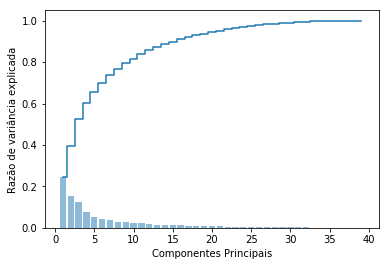

In [85]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Razão de variância explicada')
plt.xlabel('Componentes Principais')
plt.show()

Notamos que com dois componentes já conseguimos explicar 40% da variância. 
O método PCA terá perda de informação, mas ainda nos ajudará a entender os componentes mais relevantes. Em particular, a redução dos dados é considerável - aproximadamente 2 componentes, extraídos das 68 features iniciais, explicam 40% da variância.

In [86]:
y_train

array([1., 0., 1., 0., 2., 1., 0., 2., 1., 1., 2., 0., 1., 0., 1., 1., 1.,
       2., 2., 2., 1., 2., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 2.,
       1., 1., 0., 1., 0.])

In [87]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

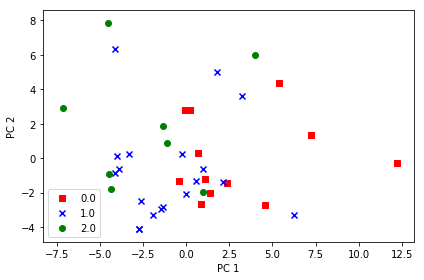

In [88]:
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [94]:
pca2 = PCA(n_components = 2)
X_train_pca2 = pca2.fit_transform(X_train)
X_test_pca2 = pca2.transform(X_test)
pca2.explained_variance_ratio_

array([0.24470139, 0.15249442])

In [95]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train_pca2, y_train)

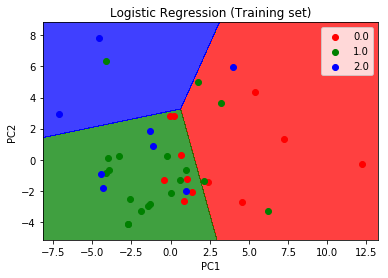

In [96]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_pca2, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Notamos que o pca não separa os dados muito bem. Então, vamos testar o kernelpca:

In [132]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [105]:
help(KernelPCA)

Help on class KernelPCA in module sklearn.decomposition.kernel_pca:

class KernelPCA(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Kernel Principal component analysis (KPCA)
 |  
 |  Non-linear dimensionality reduction through the use of kernels (see
 |  :ref:`metrics`).
 |  
 |  Read more in the :ref:`User Guide <kernel_PCA>`.
 |  
 |  Parameters
 |  ----------
 |  n_components : int, default=None
 |      Number of components. If None, all non-zero components are kept.
 |  
 |  kernel : "linear" | "poly" | "rbf" | "sigmoid" | "cosine" | "precomputed"
 |      Kernel. Default="linear".
 |  
 |  gamma : float, default=1/n_features
 |      Kernel coefficient for rbf, poly and sigmoid kernels. Ignored by other
 |      kernels.
 |  
 |  degree : int, default=3
 |      Degree for poly kernels. Ignored by other kernels.
 |  
 |  coef0 : float, default=1
 |      Independent term in poly and sigmoid kernels.
 |      Ignored by other kernels.
 |  
 |  kernel_params : mapping of 

In [133]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [134]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

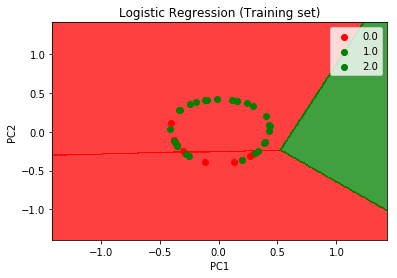

In [135]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

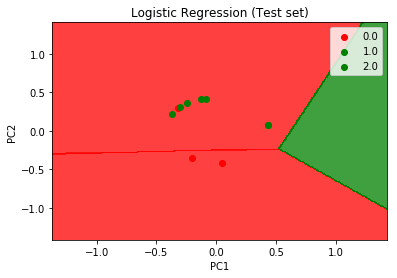

In [136]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()